In [2]:
from intrinsic_dimension import intrinsic_dimension, section_id, secondary_structure_id
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import seaborn as sns
import logging
from moleculekit.molecule import Molecule
from itertools import product
import mdtraj as md

In [ ]:
topology='examples/villin/2F4K.pdb'
trajectory='examples/villin/2F4K'
protein = 'villin'

data = []
states = [0,1,2,3,4,5] 
#estimators = ['CorrInt','lPCA', 'MADA', 'MLE', 'MOM', 'TLE', 'TwoNN']
estimators = ['TwoNN']
projection_method = 'Dihedrals'  # or 'Distances'
projection_kwargs = {'skip': 3}
 
ref = md.load(trajectory + '_1.xtc',top=topology) # folded
for estimator, state in product(estimators, states):
    mean_all, mean_last, local_id = intrinsic_dimension(topology=topology, trajectory=trajectory+f'_{state}.xtc', projection_method=projection_method, projection_kwargs = projection_kwargs,id_method='local',id_kwargs={'estimator': estimator}, verbose=False)
    t=md.load(trajectory+f'_{state}.xtc', top=topology)
    rmsf = md.rmsf(t, None) #if ref not specified computes rmsf from avg.	
    rmsd = md.rmsd(t, ref, 2)
	
    data.append({'trajectory': state,
	  'estimator': estimator,
	  'mean_all': mean_all,
	  'mean_last': mean_last,
      'local_id': local_id,
	  'rmsf' : rmsf,
	  'rmsd': rmsd})
data = pd.DataFrame(data)
data['folded'] = data['trajectory'] % 2 != 0




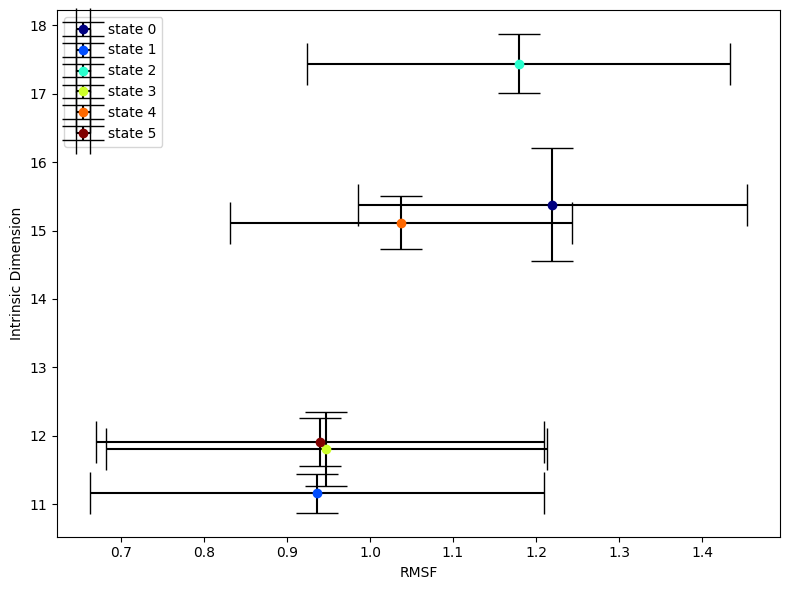

In [53]:
fig, ax = plt.subplots(figsize=(8,6))

colors = plt.cm.jet(np.linspace(0, 1, len(states)))

# group data by state
for s, color in zip(states, colors):
    subset = data[data['trajectory'] == s]
    rmsf_all = np.concatenate(subset['rmsf'].values)
    id_all   = np.concatenate(subset['local_id'].values)
    ax.scatter(
        rmsf_all.mean(),
        subset['mean_all'],
        fmt='o', capsize=15,
        color=color, elinewidth=1.5, ecolor = 'black',
        label=f"state {s}"
    )

ax.set_xlabel("RMSF")
ax.set_ylabel("Intrinsic Dimension")
ax.legend()

plt.tight_layout()
plt.show()



In [16]:
data['mean_all']

0    15.376467
1    11.157584
2    17.441821
3    11.804926
4    15.112540
5    11.903282
Name: mean_all, dtype: float64

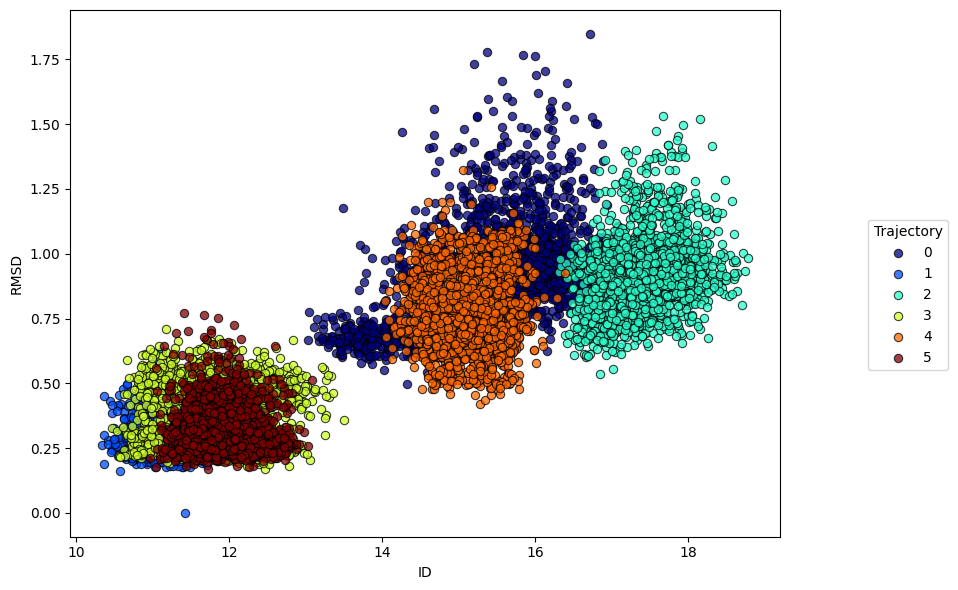

In [10]:
fig, ax = plt.subplots(figsize=(8,6))

colors = plt.cm.jet(np.linspace(0, 1, len(states)))

# group data by state
for i, s in enumerate(states):
    plt.scatter(data['local_id'][s],  data['rmsd'][s], color=colors[i], edgecolor = 'black', alpha =0.75, linewidth=0.8, label = s)
plt.xlabel('ID')
plt.ylabel('RMSD')
fig.legend(bbox_to_anchor=(1.20, 0.5), loc='center right', title='Trajectory')
plt.tight_layout()
plt.savefig(f'../bin/{protein}_ID_vs_RMSD.png', dpi = 300)
plt.show()



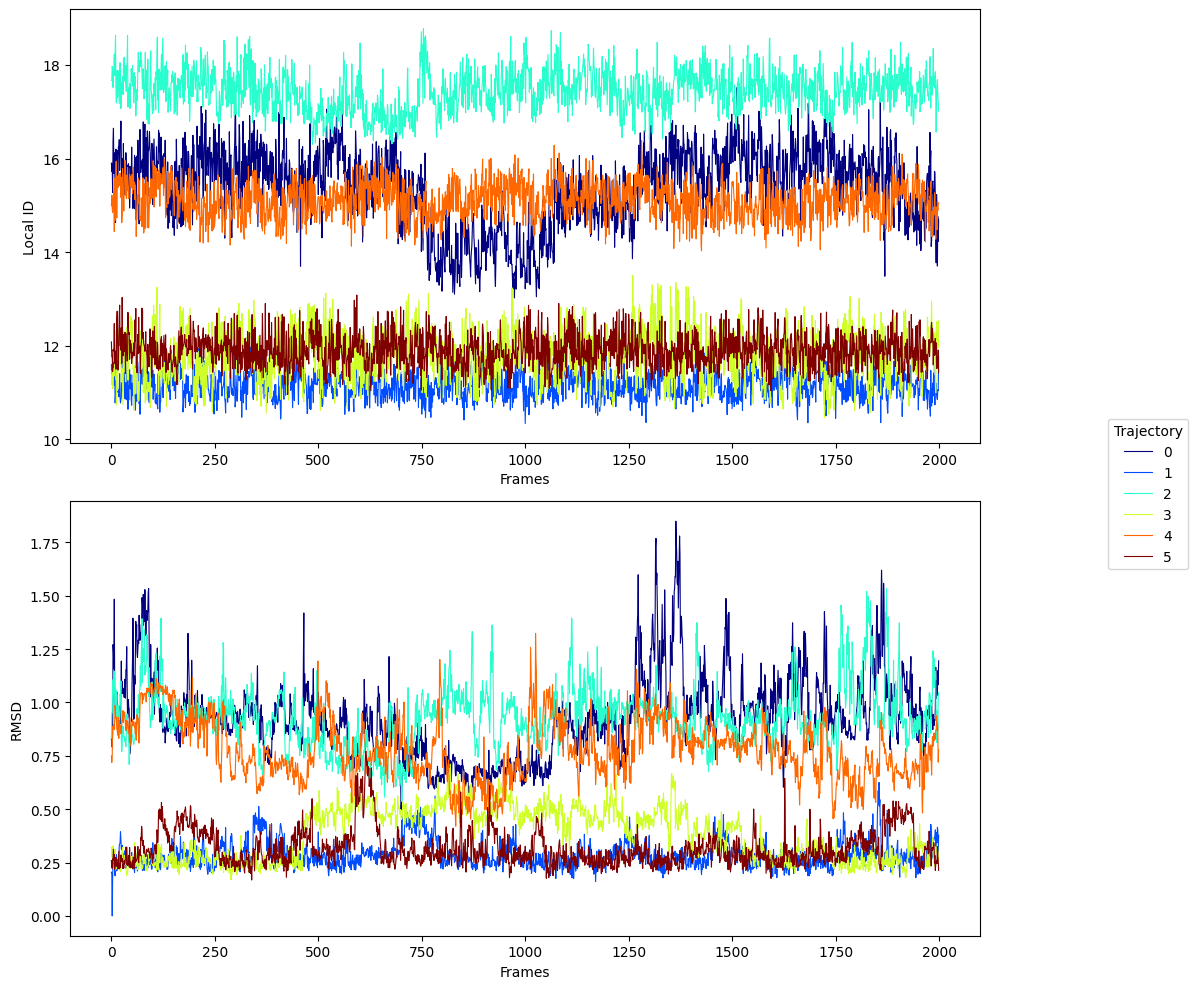

In [17]:
states = [0, 1, 2, 3, 4, 5]
colors = plt.cm.jet(np.linspace(0, 1, len(states)))
state_ids = []

fig, ax = plt.subplots(figsize=(10, 10), nrows=2)
#fig.suptitle("Instantaneous Intrinsic Dimension", fontsize=16) 
#instantaneous id
for i, s in enumerate(states):
    frames = np.arange(len(data['local_id'][0])) 
    ax[0].plot(frames, data['local_id'][s], color=colors[i], linewidth=0.8, label = s)
    ax[1].plot(frames, data['rmsd'][s], color=colors[i], linewidth=0.8)
ax[0].set_xlabel("Frames")
ax[0].set_ylabel("Local ID")
ax[1].set_xlabel("Frames")
ax[1].set_ylabel("RMSD")
#ax[0].set_title("Time")
#x[0].legend(bbox_to_anchor=(1.2, 0.5), loc="center right", title='Trajectory')   
fig.legend(bbox_to_anchor=(1.20, 0.5), loc='center right', title='Trajectory')
plt.tight_layout()
plt.savefig(f'../bin/{protein}ID_and_RMSD.png', dpi = 300)
plt.show()
